# Name: Sajin Raj Amatya 

# Importing necessary libraries and module 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor

# 1) Data Loading 



In [3]:
#loading the csv file using pandas read_csv() method
house_price_df = pd.read_csv("chennai.csv")

# 2) Data Understanding 

## 2.1) Inspection of 5 last row of the dataframe 

In [8]:
# print out the last 5 rows of the dataframe
house_price_df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
7104,P05438,T Nagar,1733,24-02-2010,1.0,1.0,4,Ab Normal,Yes,02-03-1985,...,3.4,3.7,2.1,2.89,702058,312026,19501600,3.122269e+07,1.04,1.601032
7105,P05042,Karapakkam,666,11-05-2010,1.0,1.0,2,Adj Land,Yes,20-05-1974,...,3.2,4.4,2.5,3.28,273317,74541,6211750,9.945212e+06,1.04,1.601032
7106,P10000,Velachery,1897,08-04-2004,3.0,2.0,5,Family,Yes,11-04-1995,...,3.6,4.5,3.3,3.92,346191,205551,10818480,2.191626e+07,1.04,2.025817
7107,P06508,Karapakkam,787,03-08-2009,1.0,1.0,2,Partial,Yes,11-08-1977,...,4.6,3.8,4.1,4.16,425350,119098,8507000,1.416478e+07,1.04,1.665074
7108,P09794,Velachery,1896,13-07-2005,3.0,2.0,5,Partial,Yes,24-07-1961,...,3.1,3.5,4.3,3.64,349177,79812,9976480,1.943319e+07,1.04,1.947900


## 2.2 Inspection of first five row of the dataframe 

In [11]:
# print out the top 5 rows of the dataframe 
house_price_df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


## 2.3) Dimension of the dataframe 

In [14]:
#Display the dimension of the dataframe .i.e number of rows and columns 
house_price_df.shape

(7109, 24)

## 2.4) Columns of dataframe

In [17]:
# Display the columns of dataframe using .columns attribute 
house_price_df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'INF_PRICE', '1+0.04', 'POWER(Z,Y)'],
      dtype='object')

## 2.5) Datatype of each columns in dataframe

In [20]:
# Display the data type of each columns using .dtypes attributes
house_price_df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
INF_PRICE        float64
1+0.04           float64
POWER(Z,Y)       float64
dtype: object

## 2.6) Information about each columns in dataframe

In [23]:
# Display the information about each columns like datatypes, rowcount, null value, no.of columns and rows. using info() method  
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

## 2.7) Statistic Description of the numerical columns 

In [25]:
# Statistical descrption of numerical columns including mean,standard deviation, quartile range, 
# maximum and minimum values using  describe() method 
house_price_df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
count,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03,7.109000e+03,7109.000000
mean,1382.073006,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,1.767201e+07,1.040000e+00,1.621739
std,457.410902,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,6.310658e+06,3.330903e-14,0.141455
min,500.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.591355e+06,1.040000e+00,1.315932
25%,993.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,1.323023e+07,1.040000e+00,1.539454
50%,1373.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,1.687515e+07,1.040000e+00,1.601032
75%,1744.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,2.098167e+07,1.040000e+00,1.731676
max,2500.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.354230e+07,1.040000e+00,2.025817


 ## 2.8) inspection of Null values

In [28]:
#.isna() method display the bool value for missing values and .sum() method is used to count the no. of missing values
house_price_df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
INF_PRICE         0
1+0.04            0
POWER(Z,Y)        0
dtype: int64

## 2.9) Frequency count  of  each categorical columns values

In [31]:

category_columns = house_price_df.select_dtypes(include=['object']).columns

# Loop to print value counts for each categorical column
for columns in category_columns:
    if not columns in  ['PRT_ID','DATE_SALE','DATE_BUILD'] :
        print(f"Frequency count of unique value  for '{columns}' columns:")
        print(house_price_df[columns].value_counts())
        print("\n")

Frequency count of unique value  for 'AREA' columns:
AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64


Frequency count of unique value  for 'SALE_COND' columns:
SALE_COND
Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: count, dtype: int64


Frequency count of unique value  for 'PARK_FACIL' columns:
PARK_FACIL
Yes    3587
No     3522
Name: count, dtype: int64


Frequency count of unique value  for 'BUILDTYPE' columns:
BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64


Frequency count of unique value  for 'UTILITY_AVAIL' columns:
UTILITY_AVAIL
NoSewer     3700
AllPub      1887
ELO         1522
Name: count, dtype: int64


Frequency count of unique value  for 'STREET' columns:
STREET
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64


Frequency c

## 2.10) Inspection of duplicated values

In [33]:

house_price_df.duplicated().sum()

0

# 3) Exploratory data analysis

## 3.1) Univariate Analysis 

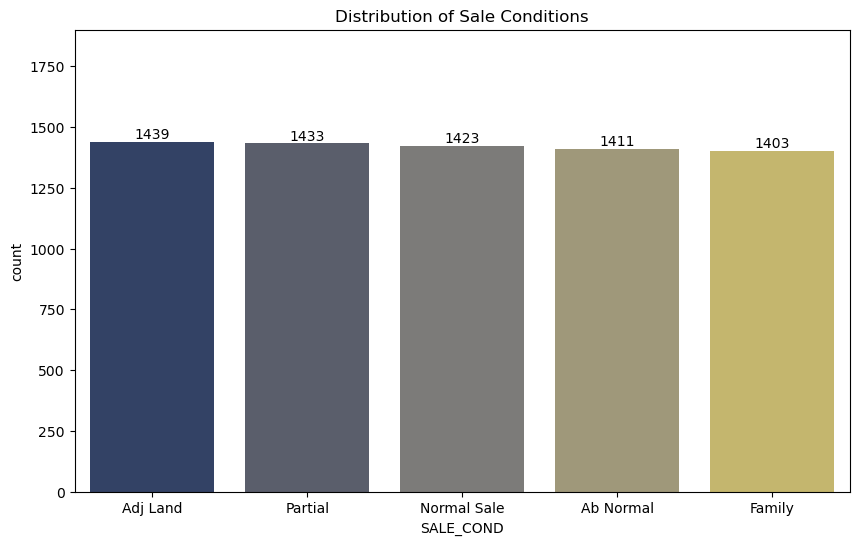

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SALE_COND', data=house_price_df, order=house_price_df['SALE_COND'].value_counts().index,palette='cividis')
plt.title('Distribution of Sale Conditions')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.ylim(0, 1900)
plt.show()

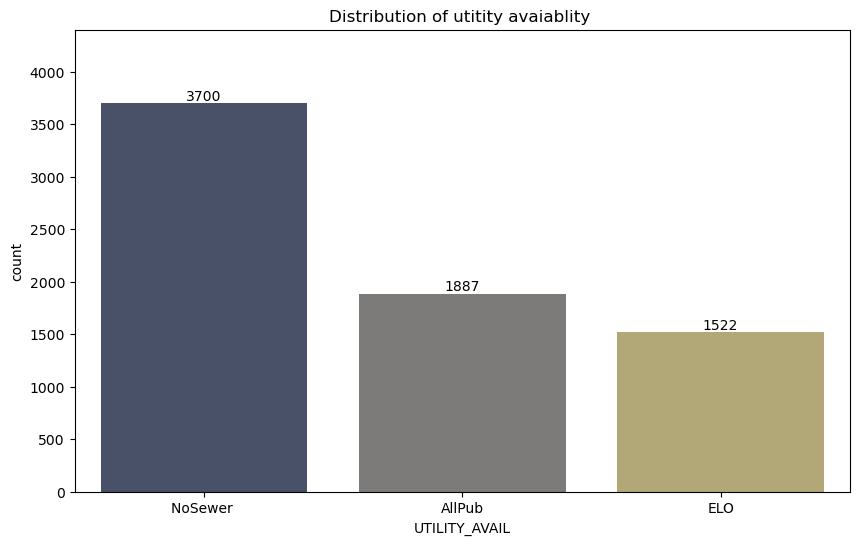

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='UTILITY_AVAIL', data=house_price_df, order=house_price_df['UTILITY_AVAIL'].value_counts().index,palette='cividis')
plt.title('Distribution of utitity avaiablity ')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.ylim(0, 4400)
plt.show()

Text(0.5, 1.0, 'Parking facilities')

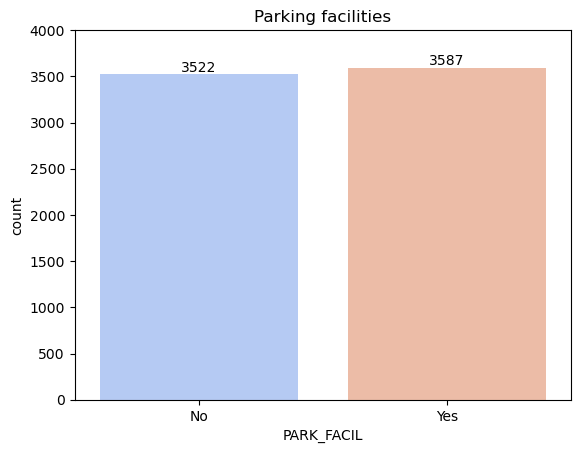

In [39]:

ax = sns.countplot(x='PARK_FACIL', data=house_price_df,palette='coolwarm')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.ylim(0,4000)
plt.title('Parking facilities')

In [42]:
house_price_df= house_price_df.dropna(how="any")

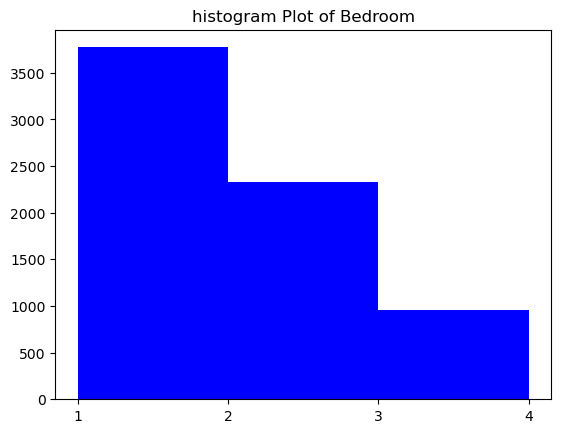

In [43]:
binss = int(house_price_df['N_BEDROOM'].max()-house_price_df['N_BEDROOM'].min())
plt.hist(house_price_df['N_BEDROOM'], bins =binss,color = "blue" )
plt.title('histogram Plot of Bedroom')
plt.xticks(sorted(house_price_df['N_BEDROOM'].unique()))
plt.show()


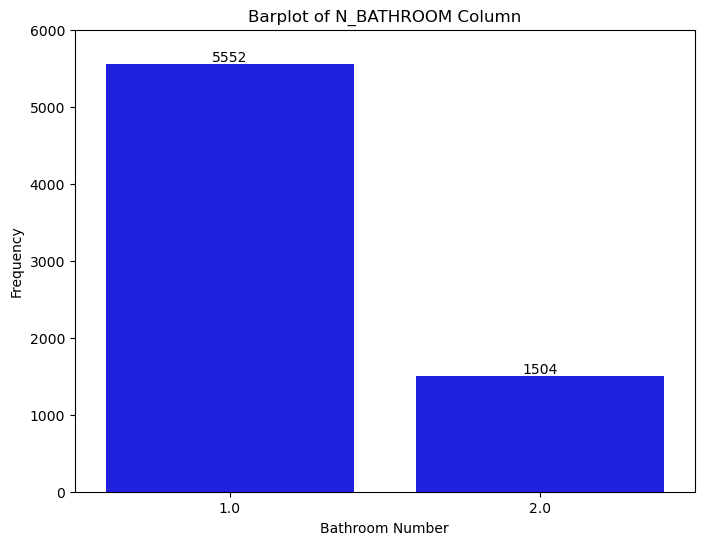

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_price_df, x='N_BATHROOM', color='blue')  # Directly use the column from the DataFrame
plt.xlabel('Bathroom Number')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.ylabel('Frequency')
plt.title('Barplot of N_BATHROOM Column')
plt.ylim(0,6000)
plt.show()


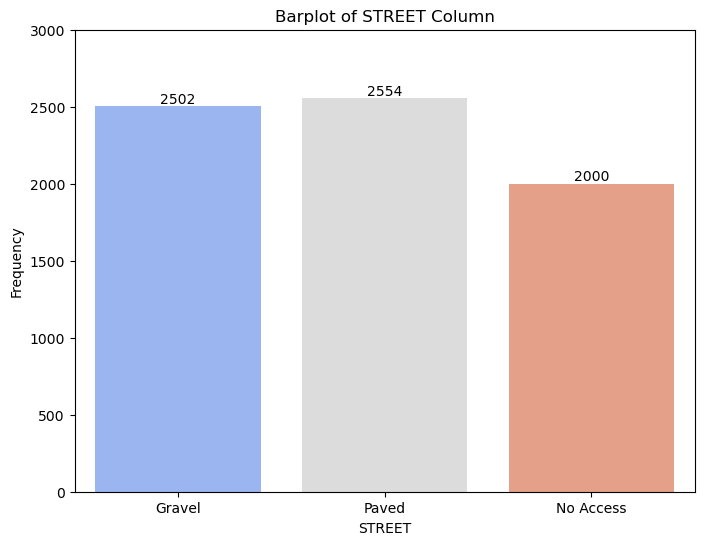

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_price_df, x='STREET', palette='coolwarm')  # Directly use the column from the DataFrame
plt.xlabel('STREET')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.ylabel('Frequency')
plt.title('Barplot of STREET Column')
plt.ylim(0,3000)
plt.show()

## 3.2) Bivarate analysis"

### Heat map of numeric columns 

<Axes: >

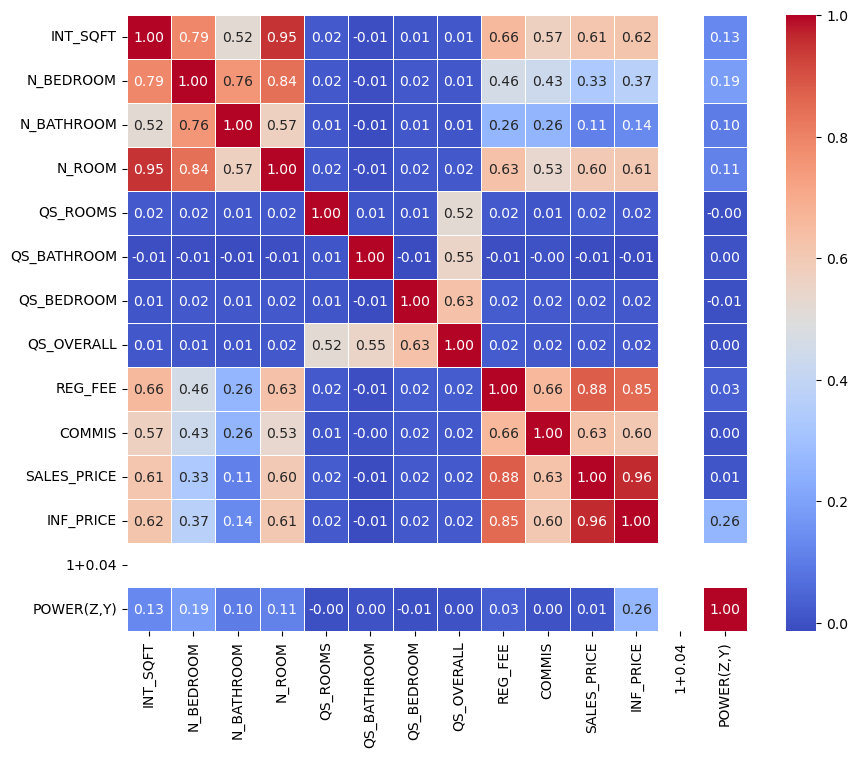

In [55]:
numeric = house_price_df.select_dtypes(include =['float64','int64'])

correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

## Regression plot of target variable vs numerical columns 

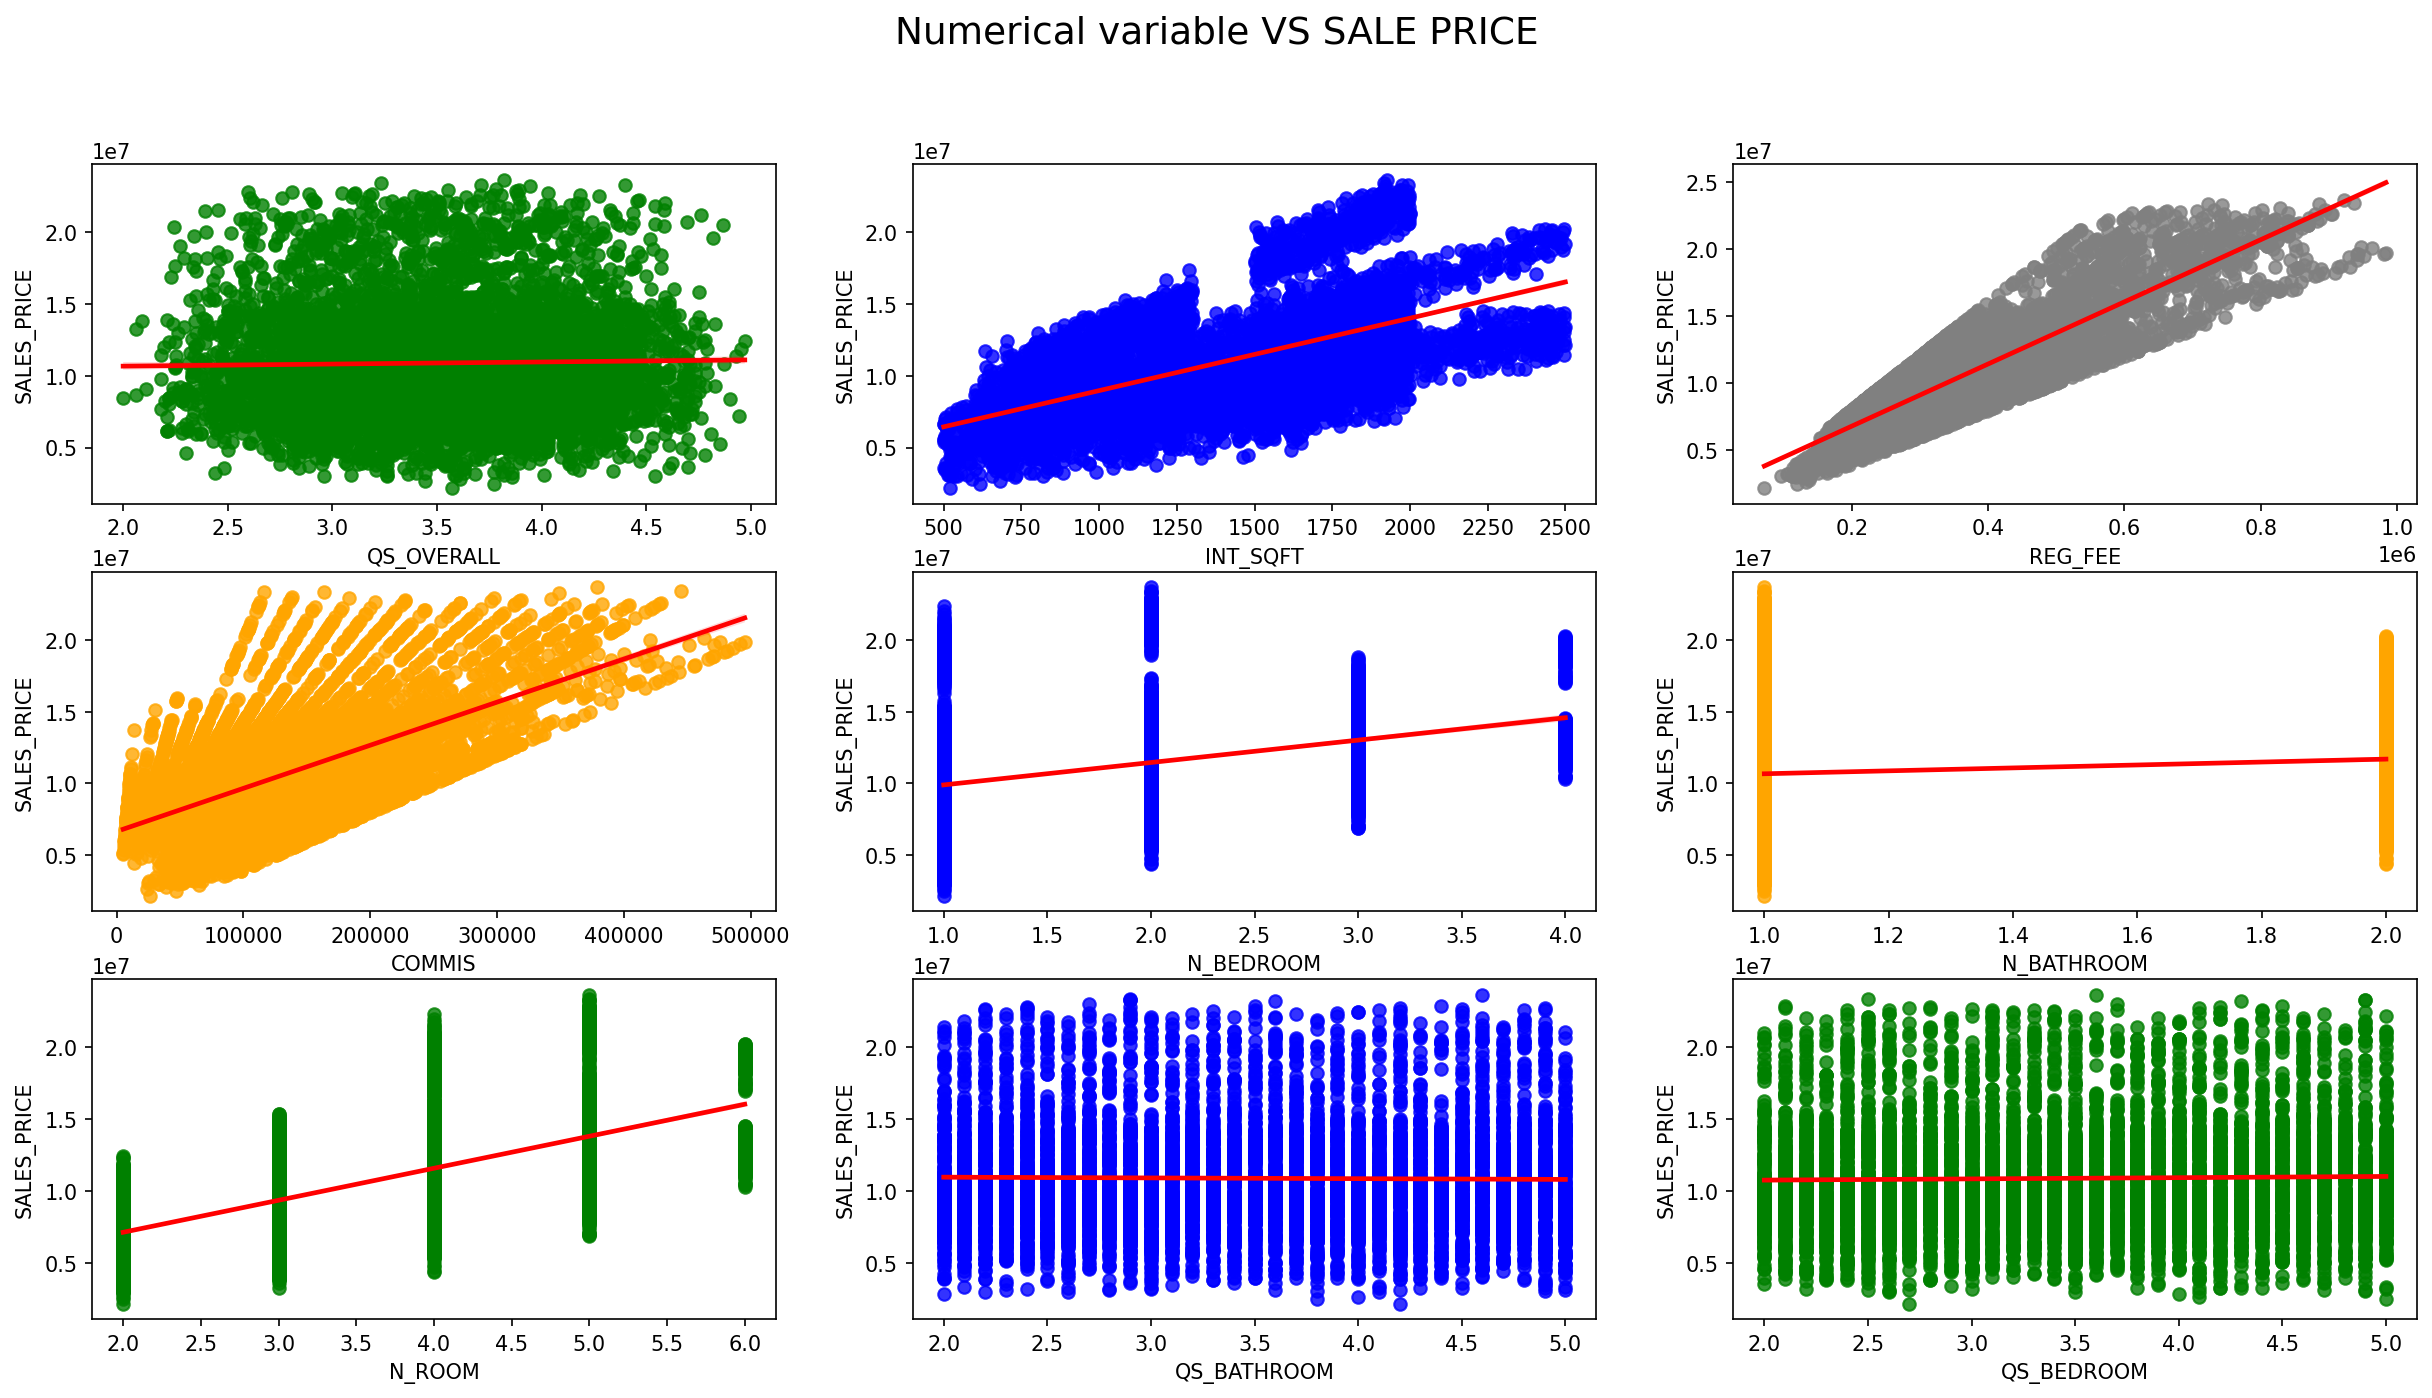

In [57]:
# List of columns to plot
columns = [
    ('QS_OVERALL', 'green'),
    ('INT_SQFT', 'blue'),
    ('REG_FEE', 'grey'),
    ('COMMIS', 'orange'),
    ('N_BEDROOM', 'blue'),
    ('N_BATHROOM', 'orange'),
    ('N_ROOM', 'green'),
    ('QS_BATHROOM', 'blue'),
    ('QS_BEDROOM', 'green')
]

# Create the figure with specified size and DPI
plt.figure(figsize=(20, 10), dpi=150)

# Loop through the columns to create the subplots
for i, (columns, color) in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=house_price_df[columns], 
        y=house_price_df.SALES_PRICE, 
        scatter_kws={"color": color}, 
        line_kws={"color": "red"}
    )

# Add the overall title
plt.suptitle("Numerical variable VS SALE PRICE", fontsize=18)

# Show the plot
plt.show()

# 4) Data preprocessing 

## 4.1) Removing the missing values 

In [61]:
# removing the rows with the missing values 
house_price_df= house_price_df.dropna(how="any")


#### Since the data quantity of missing value is small i.e 54 compare to the non missing row around 7059   removing the  entire row with the missing value might be helpful 

### Inspection after removing null values 

In [64]:
house_price_df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
INF_PRICE        0
1+0.04           0
POWER(Z,Y)       0
dtype: int64

## 4.2) Rounding up the decimal values to 2  for Numerical datatype

In [66]:
numerical_columns = house_price_df.select_dtypes(include=['float64','int64']).columns

house_price_df[numerical_columns]  = house_price_df[numerical_columns].round(2)
house_price_df[numerical_columns]

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,1986,2.0,1.0,5,4.9,4.2,2.5,3.76,760122,304049,21717770,40676975.91,1.04,1.87
1,1855,3.0,2.0,5,4.7,3.9,3.6,4.01,356321,77042,9630290,15418404.56,1.04,1.60
2,1220,2.0,1.0,4,4.5,2.6,3.1,3.32,409027,198316,12394750,16963071.24,1.04,1.37
3,1167,1.0,1.0,3,3.6,2.1,2.5,2.67,263152,33955,8488790,15287831.22,1.04,1.80
4,1847,3.0,2.0,5,2.4,4.5,2.1,3.26,604809,235204,16800250,31466553.17,1.04,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1733,1.0,1.0,4,3.4,3.7,2.1,2.89,702058,312026,19501600,31222689.91,1.04,1.60
7105,666,1.0,1.0,2,3.2,4.4,2.5,3.28,273317,74541,6211750,9945211.88,1.04,1.60
7106,1897,3.0,2.0,5,3.6,4.5,3.3,3.92,346191,205551,10818480,21916255.46,1.04,2.03
7107,787,1.0,1.0,2,4.6,3.8,4.1,4.16,425350,119098,8507000,14164780.33,1.04,1.67


## 4.3) Label Encoding for PARKING columns and utility columns ordinal categories


In [68]:
house_price_df['UTILITY_AVAIL'] = house_price_df['UTILITY_AVAIL'].replace({'NoSewer ': 0, 'ELO': 1, 'AllPub': 2})
house_price_df['UTILITY_AVAIL'].unique()

array([2, 0, 1], dtype=int64)

In [69]:
house_price_df['PARK_FACIL'] = house_price_df['PARK_FACIL'].replace({'Yes': 1, 'No': 0})
house_price_df['PARK_FACIL'].unique()

array([0, 1], dtype=int64)

## 4.4) Data type conversion for data columns 

In [71]:
house_price_df['DATE_SALE'] = pd.to_datetime(house_price_df['DATE_SALE'],dayfirst=True)
house_price_df['DATE_BUILD'] = pd.to_datetime(house_price_df['DATE_BUILD'],dayfirst=True)

## 4.5) New feature creation  

In [73]:
house_price_df['AGE_PROPERTY'] = house_price_df['DATE_SALE'].dt.year - house_price_df['DATE_BUILD'].dt.year
house_price_df['AGE_PROPERTY']

0       11
1       22
2        5
3       28
4       10
        ..
7104    25
7105    36
7106     9
7107    32
7108    44
Name: AGE_PROPERTY, Length: 7056, dtype: int32

,AGE_PROPERTY,SALES_PRICE
AGE_PROPERTY,1.000000,-0.120418
SALES_PRICE,-0.120418,1.000000


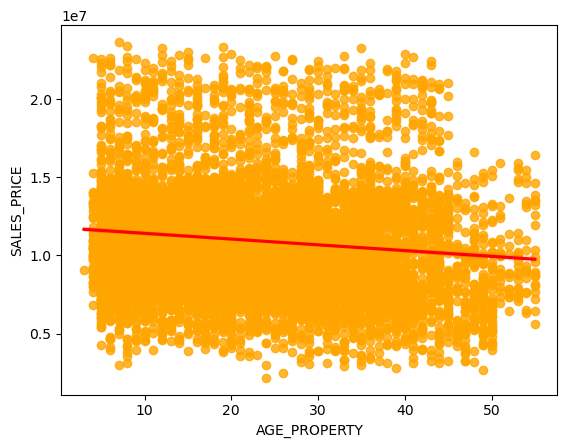

In [74]:
sns.regplot(x=house_price_df.AGE_PROPERTY, y=house_price_df.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})
house_price_df[['AGE_PROPERTY','SALES_PRICE']].corr()

## 4.7) Removal of unwanted features


In [76]:
house_price_df = house_price_df.drop(columns=["DATE_SALE","DATE_BUILD","PRT_ID","REG_FEE","COMMIS","INF_PRICE","1+0.04","POWER(Z,Y)"])

## 4.6) one hot encoding for nominal categories

In [78]:
house_price_df_encode = pd.get_dummies(house_price_df, columns=['AREA', 'BUILDTYPE', 'STREET','SALE_COND','MZZONE'])
house_price_df_encode

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,SALE_COND_Adj Land,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1986,2.0,1.0,5,0,2,4.9,4.2,2.5,3.76,...,False,False,False,False,False,False,False,True,False,False
1,1855,3.0,2.0,5,0,0,4.7,3.9,3.6,4.01,...,False,True,False,False,False,False,True,False,False,False
2,1220,2.0,1.0,4,0,0,4.5,2.6,3.1,3.32,...,False,False,False,True,False,False,False,True,False,False
3,1167,1.0,1.0,3,0,2,3.6,2.1,2.5,2.67,...,False,False,False,True,False,False,False,False,True,False
4,1847,3.0,2.0,5,0,2,2.4,4.5,2.1,3.26,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1733,1.0,1.0,4,1,0,3.4,3.7,2.1,2.89,...,False,False,False,False,False,False,False,False,True,False
7105,666,1.0,1.0,2,1,1,3.2,4.4,2.5,3.28,...,True,False,False,False,False,False,True,False,False,False
7106,1897,3.0,2.0,5,1,0,3.6,4.5,3.3,3.92,...,False,True,False,False,False,False,False,True,False,False
7107,787,1.0,1.0,2,1,1,4.6,3.8,4.1,4.16,...,False,False,False,True,False,False,False,False,True,False


## 4.7) Data scaling 


In [80]:
standardscaler = StandardScaler()

In [81]:
scaling_df = house_price_df_encode.drop(columns=['SALES_PRICE'])
house_price_scale_df = standardscaler.fit_transform(scaling_df)

## Heat map for categorical columns with target columns

<Axes: >

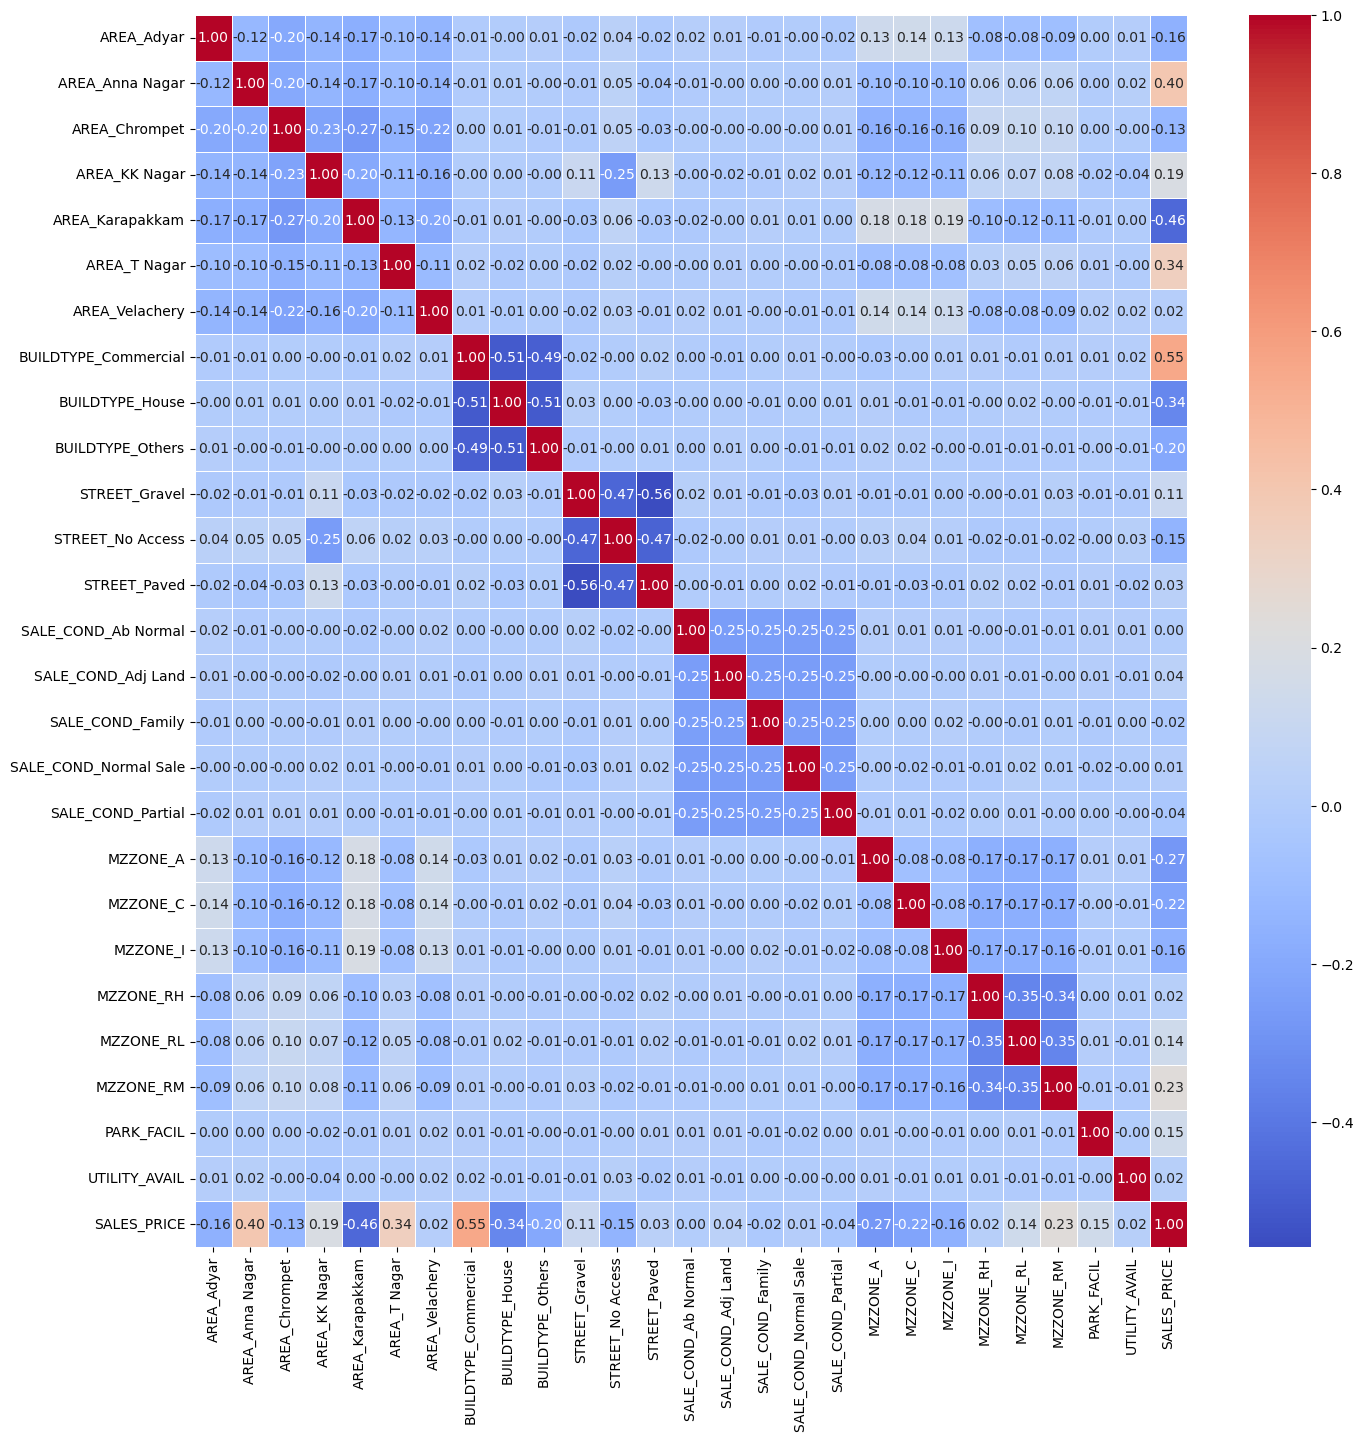

In [83]:
numeric = house_price_df_encode.select_dtypes(include =['bool'])
numeric['PARK_FACIL'] = house_price_df_encode['PARK_FACIL']
numeric['UTILITY_AVAIL'] = house_price_df_encode['UTILITY_AVAIL']
numeric['SALES_PRICE'] = house_price_df_encode['SALES_PRICE']
correlation_matrix = numeric.corr()
plt.figure(figsize=(16, 16))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Target variable and feature variable selection

In [98]:
x = house_price_scale_df # feature columns 
y = house_price_df_encode['SALES_PRICE'] # Target columns 

# Splitting data into training and testing set

In [100]:
# Splitting the data into 80 percent for training and 20 percent for testing 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Base Model initialization (Linear Regression)

In [102]:
LinearRegressionmodel = LinearRegression() #model initalization 


# Fitting the base model (linear regression)

In [104]:
LinearRegressionmodel.fit(X_train, y_train) #Fitting the model to traing data 

LinearRegression()

# Prediction on train data (Linear Regression)

In [107]:
y_pred_linear_regression_train = LinearRegressionmodel.predict(X_train)
r2_linear_regression = r2_score(y_train, y_pred_linear_regression_train)
r2_linear_regression

0.9578211112953

# Prediction on test data (Linear Regression)

In [114]:

y_pred_linear_regression = LinearRegressionmodel.predict(X_test) # Predict the data on test data 
r2_linear_regression = r2_score(y_test, y_pred_linear_regression) # evaluate the r2 score in test data 
r2_linear_regression


0.9566871642050754

 # Model evaluation Linear regression 

In [117]:
r2_linear_regression = r2_score(y_test, y_pred_linear_regression) # R2 score 
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression) # mean square error 
rmse_linear_regression = np.sqrt(mse_linear_regression) # root mean square error 
mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression) # mean absolute error 
print(f"linear_regression  R²: {r2_linear_regression:.4f}")
print(f"linear_regression MSE: {mse_linear_regression:.4f}")
print(f"linear_regression RMSE: {rmse_linear_regression :.4f}")
print(f"linear_regression MAE: {mae_linear_regression :.4f}")

linear_regression  R²: 0.9567
linear_regression MSE: 589227395349.7705
linear_regression RMSE: 767611.4872
linear_regression MAE: 585118.0931


# Cross validation 

In [120]:
# define the number fold for the data set to conduct cross validation
cross_validation_fold = KFold(n_splits=7, shuffle=True, random_state=42)
cross_validation_score = cross_val_score(LinearRegressionmodel, X_train, y_train, cv=cross_validation_fold)
print(f"cross_validation scores: {cross_validation_score}")
print(f"Average cross_validation score: {cross_validation_score.mean():.3f} ")

cross_validation scores: [0.95892916 0.95429914 0.95548755 0.95744921 0.9583067  0.95853836
 0.95710786]
Average cross_validation score: 0.957 


Text(0.5, 1.0, 'Actual sale price vs. Predicted sale price of linear regression model ')

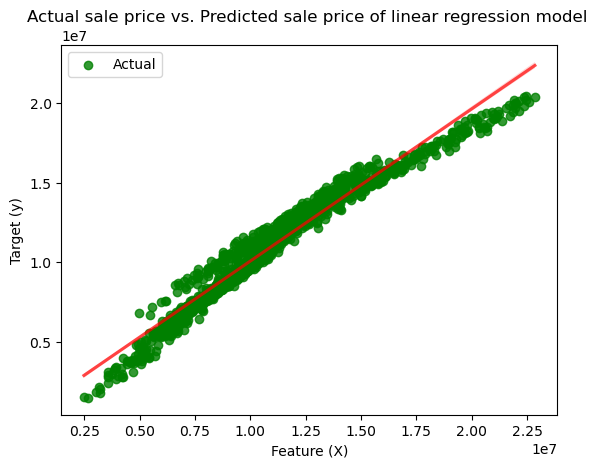

In [122]:
sns.regplot(x=y_test, y= y_pred_linear_regression, label='Actual', color='green',line_kws={'alpha': 0.7, 'color': 'red'})
plt.plot()
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.title('Actual sale price vs. Predicted sale price of linear regression model ')

# Random Forest Regressor 

In [125]:
random_forest_model = RandomForestRegressor()

# Training the random forest regressor in training data set 

In [128]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

# Prediction of Random forest regressor

In [130]:
y_pred_random_forest = random_forest_model.predict(X_test)

# Model evaluation Random forest regressor

In [132]:

r2_random_forest = r2_score(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
print(f"Random Forest R²: {r2_random_forest:.4f}")
print(f"Random Forest MSE: {mse_random_forest:.4f}")
print(f"Random Forest RMSE: {rmse_random_forest :.4f}")
print(f"Random Forest MAE: {mae_random_forest :.4f}")

Random Forest R²: 0.9802
Random Forest MSE: 269701733590.2199
Random Forest RMSE: 519328.1560
Random Forest MAE: 396632.8631


# Hyper parameter tunining 

In [ ]:
 param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }
    
    # Initialize random forest regressor
rf = RandomForestRegressor(random_state=42)
    
    # Perform grid search
grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='r2',
        verbose=1
    )
    
    # Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


# Ensemble learning method (stacking) 

In [137]:
# Define base models for stacking 
base_learners = [
    ('Random_forest', random_forest_model),
    ('linear_regression', LinearRegressionmodel)
]

# StackingRegressor initialization 

In [140]:
# Create the ensemble Stacking Regressor using random forest and linear regression model as estimator and 
# final estimator model as random forest
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=random_forest_model)

# Fitting the stacking regressor 

In [143]:
# Training  the ensemble stacking model
stacking_regressor.fit(X_train, y_train)


StackingRegressor(estimators=[('Random_forest', RandomForestRegressor()),
                              ('linear_regression', LinearRegression())],
                  final_estimator=RandomForestRegressor())

# Prediction on test data for stackingRegressor 

In [145]:
y_pred_stacking = stacking_regressor.predict(X_test)

# Model evaluation for Stacking regressor 

In [147]:
r2_stacking_model = r2_score(y_test, y_pred_stacking)
mse_stacking_model = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking_model = np.sqrt(mse_random_forest)
mae_stacking_model = mean_absolute_error(y_test, y_pred_stacking)
print(f"Ensemble stacking model R²: {r2_stacking_model :.4f}")
print(f"Ensemble stacking model MSE: {mse_stacking_model:.4f}")
print(f"Ensemble stacking model RMSE: {rmse_stacking_model :.4f}")
print(f"Ensemble stacking modelMAE: {mae_stacking_model :.4f}")

Ensemble stacking model R²: 0.9893
Ensemble stacking model MSE: 145003508171.4969
Ensemble stacking model RMSE: 519328.1560
Ensemble stacking modelMAE: 284342.0909


In [159]:


models = ["Linear Regression", "Random Forest", "Stacking"]
r2 = [r2_linear_regression, r2_random_forest, r2_stacking_model]
mse = [mse_linear_regression, mse_random_forest, mse_stacking_model]
rmse = [rmse_linear_regression, rmse_random_forest, rmse_stacking_model]
mae = [mae_linear_regression, mae_random_forest, mae_stacking_model]



(0.0, 1.5)

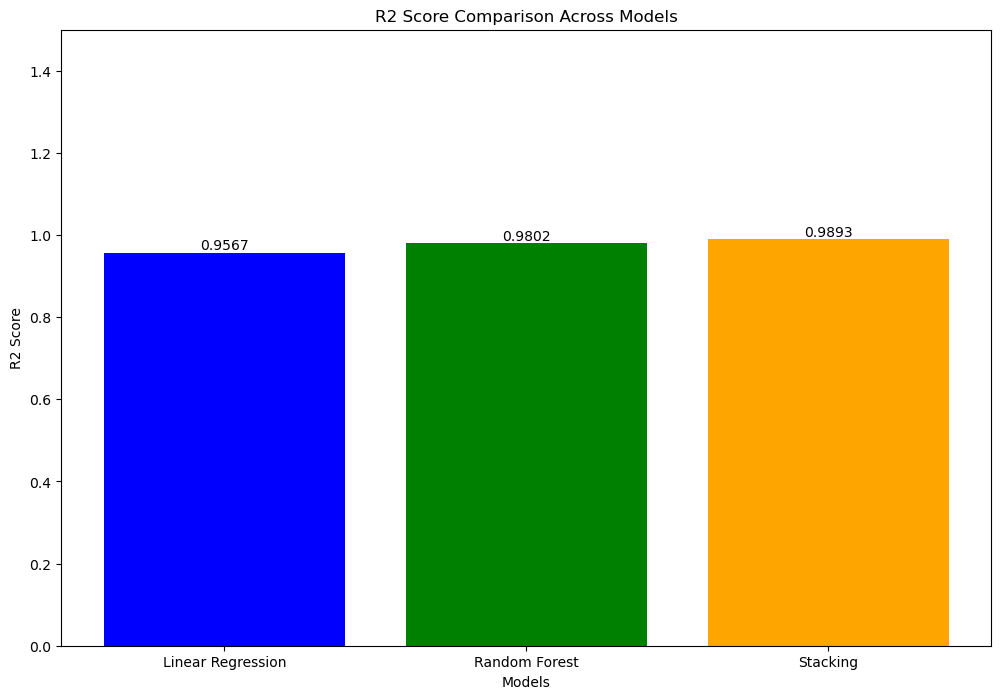

In [173]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, r2, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("R2 Score")
ax.set_title("R2 Score Comparison Across Models")
ax.set_ylim(0, 1.5)

Text(0.5, 1.0, 'RMSE Score Comparison Across Models')

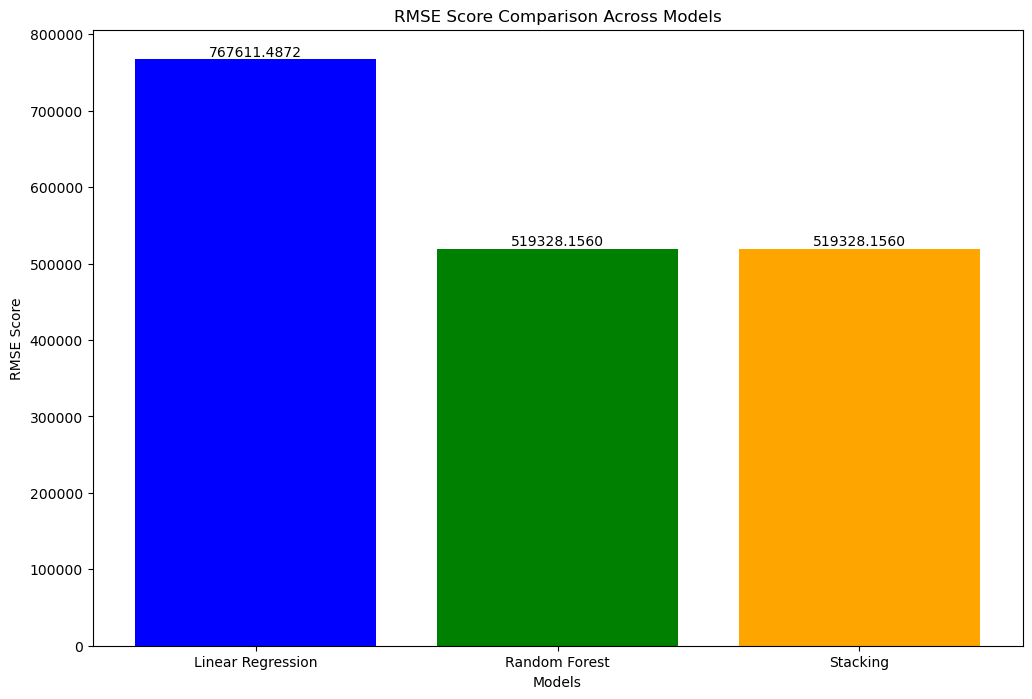

In [177]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, rmse, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("RMSE Score")
ax.set_title("RMSE Score Comparison Across Models")


Text(0.5, 1.0, 'MSE Score Comparison Across Models')

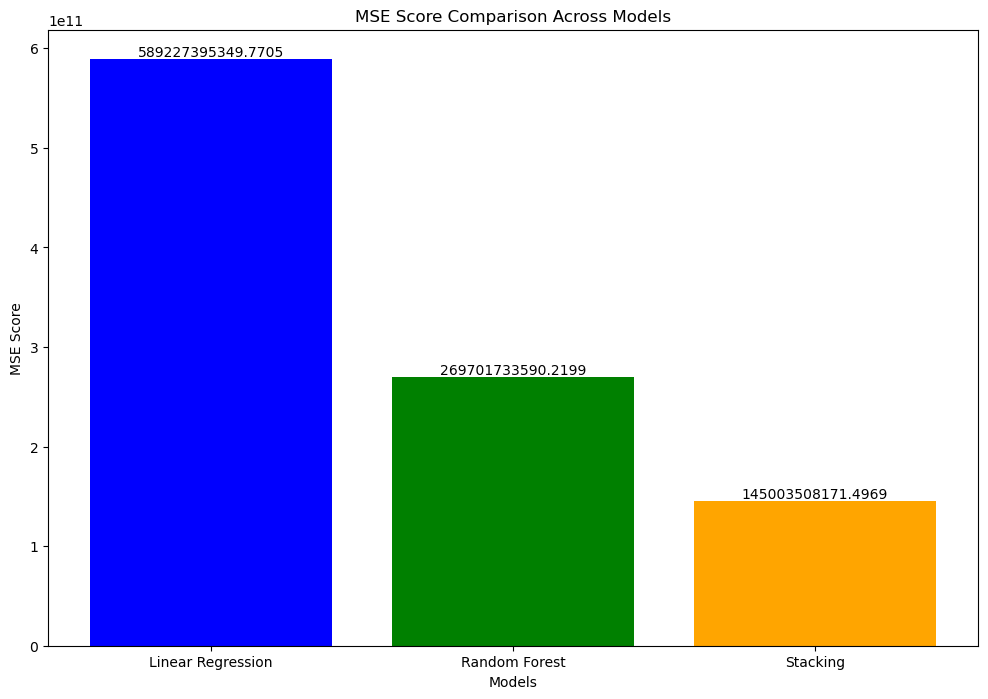

In [179]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, mse, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("MSE Score")
ax.set_title("MSE Score Comparison Across Models")


Text(0.5, 1.0, 'MAE Score Comparison Across Models')

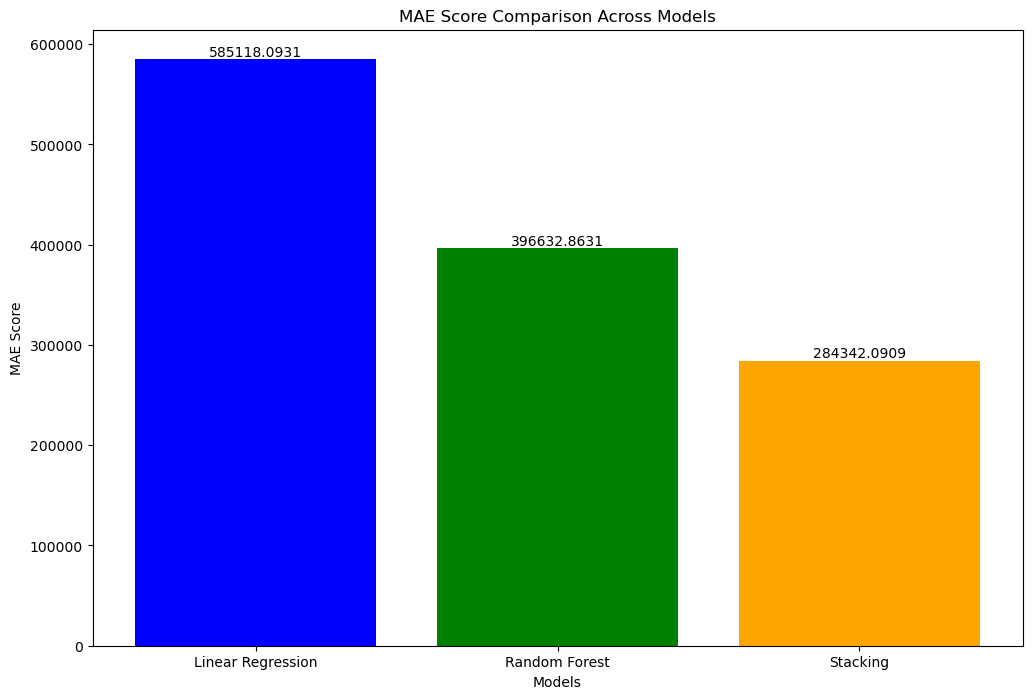

In [181]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, mae, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("MAE Score")
ax.set_title("MAE Score Comparison Across Models")
